Here is a data cleaning and some information aboutmy datasets.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

gdp_raw = pd.read_csv('gdp.csv')
pop_raw = pd.read_csv('population.csv')



In [20]:

yrs = range(2017, 2023)

gdp = gdp_raw[gdp_raw['Year'].isin(yrs)].copy()
pop = pop_raw[pop_raw['Year'].isin(yrs)].copy()

gdp.rename(columns={'Value': 'GDP'}, inplace=True)
pop.rename(columns={'Value': 'Population'}, inplace=True)

print('Filtered shapes:', gdp.shape, pop.shape)


Filtered shapes: (1537, 4) (1590, 4)


In [21]:

df = pd.merge(
    gdp,
    pop,
    on=['Country Name', 'Country Code', 'Year'],
    how='inner',
    validate='one_to_one'
)

print('Merged shape:', df.shape)
df.head()


Merged shape: (1537, 5)


,Country Name,Country Code,Year,GDP,Population
0,Afghanistan,AFG,2017,1.875346e+10,35688935.0
1,Afghanistan,AFG,2018,1.805322e+10,36743039.0
2,Afghanistan,AFG,2019,1.879944e+10,37856121.0
3,Afghanistan,AFG,2020,1.995593e+10,39068979.0
4,Afghanistan,AFG,2021,1.426650e+10,40000412.0


In [22]:
df['GDP_billion'] = (df['GDP'] / 1e9).round(2)
df.head()


,Country Name,Country Code,Year,GDP,Population,GDP_billion
0,Afghanistan,AFG,2017,1.875346e+10,35688935.0,18.75
1,Afghanistan,AFG,2018,1.805322e+10,36743039.0,18.05
2,Afghanistan,AFG,2019,1.879944e+10,37856121.0,18.80
3,Afghanistan,AFG,2020,1.995593e+10,39068979.0,19.96
4,Afghanistan,AFG,2021,1.426650e+10,40000412.0,14.27


In [23]:
#Splitted into years
gdp_2017 = df.loc[df['Year'] == 2017, ['Country Name', 'Country Code', 'Population','GDP_billion']]


gdp_2018 = df.loc[df['Year'] == 2018, ['Country Name', 'Country Code', 'Population','GDP_billion']]


gdp_2019 = df.loc[df['Year'] == 2019, ['Country Name', 'Country Code', 'Population','GDP_billion']]


gdp_2020 = df.loc[df['Year'] == 2020, ['Country Name', 'Country Code', 'Population','GDP_billion']]


gdp_2021 = df.loc[df['Year'] == 2021, ['Country Name', 'Country Code', 'Population', 'GDP_billion']]


gdp_2022 = df.loc[df['Year'] == 2022, ['Country Name', 'Country Code', 'Population','GDP_billion']]
gdp_2022.head()


,Country Name,Country Code,Population,GDP_billion
5,Afghanistan,AFG,40578842.0,14.50
11,Africa Eastern and Southern,AFE,731821393.0,1183.96
17,Africa Western and Central,AFW,497387180.0,877.14
23,Albania,ALB,2777689.0,18.92
29,Algeria,DZA,45477389.0,225.56


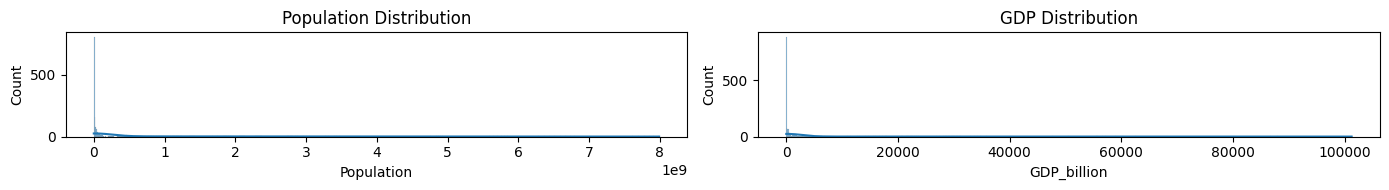

In [31]:
# Descriptive statistics
print("Descriptive stats (2017-2022):\n", df[['GDP_billion', 'Population']].describe())


Descriptive stats (2017-2022):
          GDP_billion    Population
count    1537.000000  1.537000e+03
mean     2892.018061  3.276738e+08
std      9849.998033  1.000278e+09
min         0.050000  9.992000e+03
25%        10.070000  1.877072e+06
50%        58.220000  1.056921e+07
75%       599.440000  6.806502e+07
max    101225.060000  7.989982e+09


In [36]:
#Correlation test
from scipy.stats import pearsonr
r, p_corr = pearsonr(df['Population'], df['GDP_billion'])
print(f"Pearson correlation GDP vs Population: r = {r:.4f}")

Pearson correlation GDP vs Population: r = 0.7521


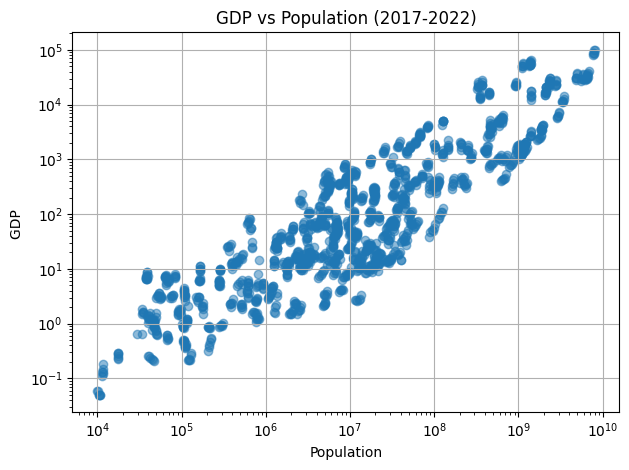

In [39]:
#Scatter Plot
plt.figure()
plt.scatter(df['Population'], df['GDP_billion'], alpha=0.5)
plt.xscale('log'); plt.yscale('log')
plt.xlabel('Population'); plt.ylabel('GDP ')
plt.title('GDP vs Population (2017-2022)')
plt.grid(True); plt.tight_layout()
plt.show()